In [165]:
import os,glob
import numpy as np
import matplotlib.pyplot as plt


import matplotlib.animation as animation

In [161]:
files =glob.glob("3D_eden_cpp/push_data/prof_Z*.txt")
nums = [int(files[i].split("Z")[1].split("_")[0]) for i in range(len(files))]
files = np.array(files)[np.argsort(nums)]
xsize,ysize,zsize=500,500,500

In [162]:
zhists =np.zeros((len(files),xsize,ysize))
for i,f in enumerate(files):
    print(str(i) +" of "+ str(len(files)))
    arr =np.loadtxt(f,delimiter=", ").astype(int)
    arr =arr[:,2].reshape((xsize,ysize))
    zhists[i]=arr

0 of 8
1 of 8
2 of 8
3 of 8
4 of 8
5 of 8
6 of 8
7 of 8


<Figure size 432x288 with 0 Axes>

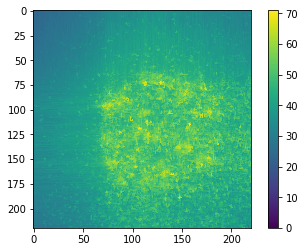

In [180]:
plt.clf()
fig,ax =plt.subplots()
init_rad=200

#im=ax.imshow(np.full((xsize,ysize),.1),vmin=.1,vmax=np.max(np.log(zhists) ))
im=ax.imshow(np.zeros((int(1.1*init_rad),int(1.1*init_rad))),vmin=0,vmax = np.max(zhists))
#im=ax.imshow(np.log(zhists[-1]),vmin=.1,vmax=np.max(np.log(zhists) ))

ims = []
for add in range(len(files)):
    #ims.append((ax.imshow(np.log(zhists[add]),vmin=.1,vmax=np.max(np.log(zhists))),))
    ims.append((ax.imshow(zhists[add,(int(xsize/2)-int(1.1*init_rad/2)):(int(xsize/2)+int(1.1*init_rad/2)),(int(ysize/2)-int(1.1*init_rad/2)):(int(ysize/2)+int(1.1*init_rad/2)) ],vmin=0,vmax=np.max(zhists)),))


im_ani = animation.ArtistAnimation(fig, ims, interval=1000, repeat_delay=3000,
                                   blit=True)
                 
plt.colorbar(im)
# To save this second animation with some metadata, use the following command:
# im_ani.save('im.mp4', metadata={'artist':'Guido'})
im_ani.save('im_push.gif',writer='imagemagick')



In [91]:
f=files[0]
arr =np.loadtxt(f,delimiter=", ").astype(int)
state=np.zeros((xsize,ysize,zsize))
for a in arr:
    state[tuple(a)]=1
zmaxwhere = arr
zmax = np.zeros((xsize,ysize))
for m in range(len(zmaxwhere)):
    if zmax[tuple(zmaxwhere[m][:2])]< zmaxwhere[m][2]:
        zmax[tuple(zmaxwhere[m][:2])] =zmaxwhere[m][2]

In [72]:
zhists =np.zeros((len(files),xsize,ysize))
for i,f in enumerate(files):
     print(str(i) +" of "+ str(len(files)))


    arr =np.loadtxt(f,delimiter=", ").astype(int)


    zmaxwhere = arr
    zmax = np.zeros((xsize,ysize))
    for m in range(len(zmaxwhere)):
        if zmax[tuple(zmaxwhere[m][:2])]< zmaxwhere[m][2]:
            zmax[tuple(zmaxwhere[m][:2])] =zmaxwhere[m][2]

        zhists[i] = zmax


0
1
2


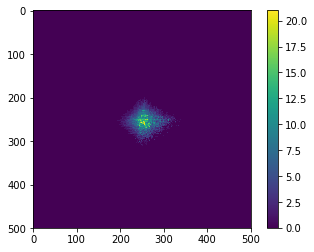

In [74]:
fig,ax =plt.subplots()

im=ax.imshow(zhists[-1],vmin=0,vmax=np.max(zhists))

ims = []
for add in range(len(files[0:3])):
    ims.append((ax.imshow(zhists[add],vmin=0,vmax=np.max(zhists)),))

im_ani = animation.ArtistAnimation(fig, ims, interval=2000, repeat_delay=3000,
                                   blit=True)
                 
plt.colorbar(im)
# To save this second animation with some metadata, use the following command:
# im_ani.save('im.mp4', metadata={'artist':'Guido'})
im_ani.save('im_push.gif',writer='imagemagick')



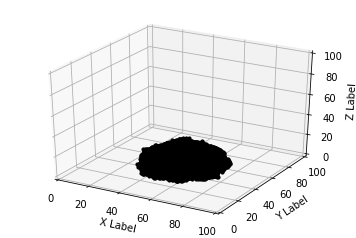

In [349]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].

    
for m in np.argwhere(arr==1):
    ax.scatter(*m,c='k',s=10)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

ax.set_xlim([0,100])
ax.set_ylim([0,100])
ax.set_zlim([0,100])
plt.show()